# Izpit 18. januar 2021


## 1. Valovi epidemije

V nekem kraju je bilo število okuženih, po dnevih, takšno:

In [1]:
po_dnevih = [1, 5, 6, 0, 0, 0, 2, 3, 0, 5, 8, 0]

V prvem valu je bilo torej okuženih 1 + 5 + 6 = 12 ljudi, v drugem 2 + 3 = 5 in v tretjem 13, skratka `[12, 5, 13]`.

Napiši funkcijo `po_valovih(po_dnevih)`, ki prejme seznam s številom okuženih po dnevih in vrne seznam s številom okuženih po valovih. Valovi so ločeni z enim ali več dnevi brez okužb. Dnevi brez okužb so lahko tudi na začetku ali koncu seznama. Za več primerov glej teste.

### Rešitev

Običajna rešitev je nekako takšna.

In [2]:
def valovi(s):
    v_valovih = []
    okuzenih = 0
    for x in s + [0]:
        if x == 0 and okuzenih:
            v_valovih.append(okuzenih)
            okuzenih = 0
        else:
            okuzenih += x
    return v_valovih

In [3]:
valovi([1, 5, 6, 0, 0, 0, 2, 3, 0, 5, 8, 0])

[12, 5, 13]

Lepa finta te rešitve je, da na konec seznama pripnemo `0` (glej `for`!), tako da se vedno konča z 0, ki poskrbi, da pripnomo tudi število okuženih v zadnjem valu. Brez tega je rešitev takšna.

In [4]:
def valovi(s):
    v_valovih = []
    okuzenih = 0
    for x in s:
        if x == 0 and okuzenih:
            v_valovih.append(okuzenih)
            okuzenih = 0
        else:
            okuzenih += x
            
    if okuzenih:
        v_valovih.append(okuzenih)
        
    return v_valovih

In [5]:
valovi([1, 5, 6, 0, 0, 0, 2, 3, 0, 5, 8])

[12, 5, 13]

Nekaj študentov je napisalo eno od takšnih rešitev in dodalo komentar "ne znam lepše".

Lepše gre, če poznamo funkcijo `groupby`, ki jo dobimo v modulu `itertools`. Podamo ji seznam in ključ, po katerem na sestavi zaporedne skupine znotraj tega seznama. Pri nas bo ključ to, ali je element enak 0 ali ne. Funkcija vrne generator skupin. Poglejmo, kaj naredi z našimi bolniki.

In [6]:
from itertools import groupby

list(groupby(po_dnevih, lambda x: x != 0))

[(True, <itertools._grouper at 0x7fd24d083890>),
 (False, <itertools._grouper at 0x7fd24d083910>),
 (True, <itertools._grouper at 0x7fd24d0839d0>),
 (False, <itertools._grouper at 0x7fd24d083750>),
 (True, <itertools._grouper at 0x7fd24d083650>),
 (False, <itertools._grouper at 0x7fd24d083790>)]

Najprej je skupina elementov, za katere funkcija, ki smo jo podali vrne `True`, za drugo skupino vrne `False` in tako naprej. (Funkcija bi lahko vračala tudi drugačne vrednosti; `groupby` da v isto skupino takšne, pri katerih je vrednost enaka).

Poglejmo, kakšne so v resnici te skupine.

In [7]:
for k, group in groupby(po_dnevih, lambda x: x  != 0):
    print(k, list(group))

True [1, 5, 6]
False [0, 0, 0]
True [2, 3]
False [0]
True [5, 8]
False [0]


Pobrati moramo skupine, pri katerih je ključ `True` in izračunati njihove vsote, vse skupaj pa zložiti v seznam.

In [8]:
def valovi(s):
    return [sum(g) for v, g in groupby(s, lambda x: x != 0) if v]

valovi(po_dnevih)

[12, 5, 13]

## 2. Sledilnik

- Prvi dan so zaprli gledališča in smučišča.
- Drugi dan so zaprli še šole, frizerje in muzeje, vendar so ob tem odprli smučišča.
- Tretji dan so zaprli knjižnice in odprli muzeje in smučišča (ki pa so bila itak že odprta!).
- Četrti dan so zaprli smučišča (in knjižnice in gledališča, ampak ta so bila zaprta že od prej) in odprli šole.
- Peti dan so odprli šole ter zaprli frizerje in smučišča.
- Šesti dan so zaprli smučišča.
- Sedmi dan so počivali(!).
- Osmi dan so odprli smučišča.

Vse skupaj predstavimo s seznamom parov seznamov. Vsak par ustreza enemu dnevu; prvi element para pove, kaj se je tisti dan zaprlo, drugi pa, kaj se je odprlo. Če je vse skupaj zapleteno: tako pač v resnici je. Tisti Janez, ki je sestavil to nalogo, s tem nima ničesar.

In [9]:
dnevi = [
    (["gledališča", "smučišča"],              []),
    (["šole", "frizer", "muzeji"],            ["smučišča"]),
    (["knjižnice"],                           ["muzeji", "smučišča"]),
    (["smučišča", "knjižnice", "gledališča"], ["šole"]),
    (["šole"],                                ["frizer", "smučišča"]),
    (["smučišča"],                            []),
    ([],                                      []),
    ([],                                      ["smučišča"])
]

Napiši funkcijo `sledilnik(dnevi)`, ki prejme seznam, kot je gornji, in vrne, kolikšno je največje število hkrati zaprtih stvari. V gornjem primeru vrne 4, ker so bile na, recimo, drugi dan, istočasno zaprte štiri stvari (gledališča, šole, frizerji in muzeji).

### Rešitev

Tole je bila naloga iz množic: vzdrževati je bilo potrebno množico prepovedanih dejavnosti ter v vsakem koraku od nje odšteti, kar je sveže dovoljeno ter "priunijati", kar je na novo prepovedano. Po vsakem koraku pa preverimo, ali je trenutno število prepovedi večje od največjega doslej.

In [10]:
def sledilnik(dnevi):
    zaprto = set()
    zaprtih = 0
    for zaprli, odprli in dnevi:
        zaprto -= set(odprli)
        zaprto |= set(zaprli)
        if len(zaprto) > zaprtih:
            zaprtih = len(zaprto)
    return zaprtih

In [11]:
sledilnik(dnevi)

4

Nekdo je pisal samo 99 %, ker je pri tej nalogi kompliciral z nekim slovarjem. Na Discordu sva ugotovila, da pravzaprav ni tako slaba ideja, saj vodi - če jo odkompliciramo iz slovarja v seznam - v takšno rešitev.

In [12]:
def sledilnik(dnevi):
    zaprto = [set()]
    for zapiranja, odpiranja in dnevi:
        zaprto.append((zaprto[-1] | set(zapiranja)) - set(odpiranja))
    return max(len(x) for x in zaprto)

Seznam `zaprto` bo vseboval vse, kar je zaprto od dneva 0 naprej. No, prvi element seznama bo prazna množica. Potem pa za vsak dan dodamo nov element, ki je enak zadnjemu, ki mu dodamo vse, kar se je ta dan zaprlo, in odvzamemo vse, kar se je odprlo. Na koncu vrnemo največjo velikost množice (lepše slovensko bi bilo velikost največje množice, ampak v Pythonu se to pač napiše največja velikost, `max(len(...`).

Naloga je imela le en test in predpostavil sem, da bo to zadoščalo. Pravzaprav bi moralo ... a nekateri so računali vse mogoče druge stvari; nekdo je napisal funkcijo, ki vrne število dni, pri katerih imamo vsaj en `[]` (ni nove prepovedi ali odprtja), nekateri so vrnili maksimalno število prepovedi v enem dnevu, ki so mu prišteli 1, zato da so dobili 4 in ne 3, mnogi so opazovali le prepovedi in ne odprtij ter vse skupaj obrnili tako, da je bil rezultat slučajno 4. Vse take rešitve, ki so očitno napačne, sem štel kot napačne.

Bolj pogosta pomanjkljivost je bila, da niste uporabljali unij in presekov, temveč napisali zanko, v kateri kličete `add` oziroma `remove` ali `discard`. Še bolj žalosten se, bil, če ste namesto množic uporabljali sezname. Nekateri so uporabljali slovarje namesto množic... Storilci takih dejanj so tu izgubili par točk, za nikogar pa to ni bilo usodno.


## 3. Širjenje okužbe

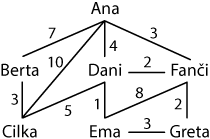

Vemo, kdo se je na kateri dan družil s kom (glej sliko). Podatki so shranjeni v slovarju (vsako druženje je zabeleženo dvakrat, pri obeh družabnikih):

In [13]:
druzenja = {
    "Ana": [("Berta", 7), ("Cilka", 10), ("Dani", 4), ("Fanči", 3)],
    "Berta": [("Ana", 7), ("Cilka", 3)],
    "Cilka": [("Ana", 10), ("Berta", 3), ("Dani", 5)],
    "Dani": [("Ana", 4), ("Cilka", 5), ("Ema", 1), ("Fanči", 2)],
    "Ema": [("Dani", 1), ("Fanči", 8), ("Greta", 3)],
    "Fanči": [("Ana", 3), ("Dani", 2), ("Ema", 8), ("Greta", 2)],
    "Greta": [("Ema", 3), ("Fanči", 2)]
}

Če se nekdo druži s kom, ki je okužen, postane sam kužen naslednji dan (na isti dan, ko se je okužil, pa še ni nevaren).

Napiši funkcijo `okuzeni(oseba, cas, druzenja)`, ki prejme ime osebe, dan, na katerega se je okužila, in slovar druženj. Funkcija vrne množico vseh okuženih.

Klic `okuzeni("Ana", 3, druzenja)` vrne `{"Ana", "Berta", "Cilka", "Dani"}`, ker Ana okuži Dani in Berto, Dani pa še Cilko (Cilko bi tudi direktno okužila Ana, vendar jo Dani prehiti). Fanči ni okužena: Ana na dan 3 še ni bila kužna, Dani pa se je tako ali tako okužila šele na dan 4.


**Namig:** ne boj se, da se kaj *zacilka*, saj nihče ni kužen na dan, ko se je okužil, zato časi vedno naraščajo.

### Rešitev

Naloga je praktično enaka nalogi, v kateri iščemo vse člane rodbine, le da pazimo še na časovne omejitve. Preprosti rekurzivni rešitvi sta

In [14]:
def okuzeni(oseba, cas, druzenja):
    okuzenih = {oseba}
    for kdo, kdaj in druzenja[oseba]:
        if kdaj > cas:
            okuzenih |= okuzeni(kdo, kdaj, druzenja)
    return okuzenih

In [15]:
def okuzeni(oseba, cas, druzenja):
    return set.union({oseba},
                     *(okuzeni(kdo, kdaj, druzenja)
                       for kdo, kdaj in druzenja[oseba] if kdaj > cas))

In [16]:
okuzeni("Ana", 3, druzenja)

{'Ana', 'Berta', 'Cilka', 'Dani'}

Se da rešiti nalogo brez rekurzije? V drugem letniku boste to spoznali kot iskanje v širino, videli pa smo ga tudi letos na dodatnih predavanjih. Takole:

In [17]:
def okuzeni(oseba, cas, druzenja):
    preveriti = [(oseba, cas)]
    okuzenih = set()
    for oseba, cas in preveriti:
        okuzenih.add(oseba)
        for stik, cas_stika in druzenja[oseba]:
            if cas_stika > cas:
                preveriti.append((stik, cas_stika))
    return okuzenih

In [18]:
okuzeni("Ana", 3, druzenja)

{'Ana', 'Berta', 'Cilka', 'Dani'}

Kot običajno se je naloga iz rekurzije izkazala za najtežjo nalogo, čeprav jo je rešilo veliko (pravzaprav morda celo nerealno veliko) število študentov).

Nekaj študentov je nalogo rešilo tako, da je napisalo zanko znotraj zanke znotraj zanke znotraj zanke ... pač toliko zank, kolikor je bila dolga najdaljša pot v testih. Tega nisem mogel šteti za pravilno rešitev.

## 4. Identifikator

V laboratorij so dobili tri različne viruse, ki pa so vsi predstavniki "angleškega" seva Covida. Zaporedja mRNA teh treh, gentlemanskih virusov so:

In [19]:
pozitivni = ['GGGUGCCCCA', 'CCCAUAGGGU', 'CAGCUCGGUU']

Tole pa so štirje primeri "običajnega" Covida:

In [20]:
negativni = ['ACCUCAGGAG', 'UCGACCGAAG', 'GUCACUCGCA', 'CGCUUCCCGC']

V laboratoriju uporabljajo naslednje testne fragmente (koščke) mRNA:

In [21]:
fragmenti = ["GGU", "CCC", "ACC", "GGG"]

Idealno bi bilo, če bi našli fragment, ki se pojavlja v vseh angleških in nobenem od ostalih. Ker ni nujno, da tak fragment obstaja, pa bomo zadovoljni s takšnim, ki se pojavi v čimveč angleških in čim manj neangleških.

- GGU se pojavi v 3 pozitivnih in 0 negativnih, razlika je 3.
- CCC se pojavi v 2 pozitivnih in 1 negativnem, razlika je 1.
- GGG se pojavi v 2 pozitivnih in 0 negativnih, razlika je 0.
- ACC se pojavi v 0 pozitivnih in 2 negativnih, razlika je -1.

Najboljši je GGU.

Napiši funkcijo `identifikator(pozitivni, negativni, fragmenti)`, ki prejme seznam pozitivnih in negativnih primerov ter seznam fragmentov. Vrniti mora fragment, pri katerem je razlika med številom njegovih pojavitev v pozitivnih in v negativnih primerih virusov čim večja. Če je takšnih fragmentov več, lahko vrne kateregakoli od njih.

### Rešitev

Nalogo je bilo možno rešiti na kup načinov. Večina je komplicirala s slovarja in na koncu dokazala, da znajo googlati in najti zapleten klic (ki ga pretežno ne razumejo) in vrne ključ, ki pripada največji vrednosti.

Tole je nekoliko daljša, a čisto lepa rešitev.

In [22]:
def identifikator(pozitivni, negativni, fragmenti):
    naj_frag = None
    naj_razlika = 0  # Če ne dobimo pozitivne razlike, naj gre vse k vragu :)
    for fragment in fragmenti:
        razlika = 0
        for poz in pozitivni:
            if fragment in poz:
                razlika += 1
        for neg in negativni:
            if fragment in neg:
                razlika -= 1
        if razlika > naj_razlika:
            naj_razlika = razlika
            naj_frag = fragment
    return naj_frag

In [23]:
identifikator(pozitivni, negativni, fragmenti)

'GGU'

Skrajšamo jo, če se spomnimo, da je `True` isto kot `1` in `False` isto kot `0`.

In [24]:
def identifikator(pozitivni, negativni, fragmenti):
    naj_frag = None
    naj_razlika = 0  # Če ne dobimo pozitivne razlike, naj gre vse k vragu :)
    for fragment in fragmenti:
        razlika = 0
        for poz in pozitivni:
            razlika += fragment in poz
        for neg in negativni:
            razlika -= fragment in neg
        if razlika > naj_razlika:
            naj_razlika = razlika
            naj_frag = fragment
    return naj_frag

Odtod je le korak do

In [25]:
def identifikator(pozitivni, negativni, fragmenti):
    naj_frag = None
    naj_razlika = 0  # Če ne dobimo pozitivne razlike, naj gre vse k vragu :)
    for fragment in fragmenti:
        razlika = sum(fragment in poz for poz in pozitivni) \
                  - sum(fragment in neg for neg in negativni)
        if razlika > naj_razlika:
            naj_razlika = razlika
            naj_frag = fragment
    return naj_frag

Toliko bi po tem predmetu načelno morali znati vsi. Kdor zna še malo več, pa je napisal

In [26]:
def identifikator(pozitivni, negativni, fragmenti):
    return max(fragmenti,
               key=lambda f: sum(f in primer for primer in pozitivni)
                             -sum(f in primer for primer in negativni))

Pravzaprav bi to morali znati napisati vsi, ki so v rešitev napisali tisti `max`, ki so ga nagooglali. :)

## 5. Izbijanje zob

Južnoameriški sev je posebej trdovraten in lotiti se ga je mogoče le s pestmi: izbiti mu je potrebno vse dele mRNA. Recimo, da je njegova mRNA v začetku takšna: `"ACCUTCCUUGUACUUTAA"`. Če mu izbijemo `"CUU"`, ostane le še `"ACCUTCGUATAA"` (iz niza odstranimo obe pojavitvi `CUU`). Vendar je še vedno živ in brca in grize in davi. Če mu izbijemo `A`, ostane `"CCUTCGUT"`. In tako naprej. Virus je mrtev šele, ko mu ne ostane nič več.

Napiši razred `Virus` z naslednjimi metodami:

- konstruktor sprejme začetno mRNA virusa.
- `izbij(fragment)` iz virusove mRNA odstrani vse pojavitve podanega fragmenta; metoda ne vrne ničesar,
- `ostanek()` vrne trenutno virusovo mRNA, 
- `mrtev()` vrne `True`, če je virus mrtev (od njegove mRNA ni ostalo nič več) in `False`, če je živ.

(Vsaka metoda seveda prejme še `self`.)

### Rešitev

In [27]:
class Virus:
    def __init__(self, mRNA):
        self.mRNA = mRNA

    def mrtev(self):
        return self.mRNA == ""

    def izbij(self, fragment):
        self.mRNA = self.mRNA.replace(fragment, "")

    def ostanek(self):
        return self.mRNA

Tipična "napaka" je bila

```python
    def mrtev(self):
        if self.mRNA == "":
            return True
        else:
            return False
```

Kot je napisal Pesnik: "*Vsi bodo dosegli svoj cilj, samo jaz ga ne bom dosegel*". Nekateri bodo pač vedno pisali tako.

V resnici ni napaka, samo nerazumevanje tega, kakšno vrednost ima `self.mRNA == ""`. Vredno ene odbite točke, ki se nikomur ni poznala, le jaz sem bil mirnejši.

Drugo: nekateri se niso spomnili na `replace` in se mučili z odstranjevanjem podniza.